# Sistem Pengatur Kecepatan Kipas AC Otomatis dengan Fuzzy Logic

Sistem ini menggunakan fuzzy logic untuk mengatur kecepatan kipas AC berdasarkan:
- **Input 1**: Suhu ruangan (°C)
- **Input 2**: Kelembaban (%)
- **Output**: Kecepatan kipas (%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## 1. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('ac_dataset.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (115, 3)

First 5 rows:


,temperature,humidity,fan_speed
0,16,30,20
1,17,35,20
2,18,40,25
3,19,45,25
4,20,50,30


In [3]:
# Statistik dataset
df.describe()

,temperature,humidity,fan_speed
count,115.000000,115.000000,115.000000
mean,28.382609,61.826087,63.956522
std,6.794712,19.470293,24.526173
min,16.000000,20.000000,15.000000
25%,23.000000,45.000000,45.000000
50%,28.000000,60.000000,70.000000
75%,34.000000,77.500000,85.000000
max,40.000000,95.000000,100.000000


## 2. Definisi Variabel Fuzzy

### Input Variables:
1. **Suhu** (16-40°C)
   - Dingin: 16-22°C
   - Sejuk: 20-28°C
   - Hangat: 26-34°C
   - Panas: 32-40°C

2. **Kelembaban** (20-100%)
   - Rendah: 20-40%
   - Sedang: 35-70%
   - Tinggi: 65-100%

### Output Variable:
**Kecepatan Kipas** (0-100%)
- Lambat: 0-40%
- Sedang: 30-70%
- Cepat: 60-100%

In [4]:
# Definisi input dan output variables
temperature = ctrl.Antecedent(np.arange(16, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions untuk Suhu
temperature['dingin'] = fuzz.trapmf(temperature.universe, [16, 16, 20, 22])
temperature['sejuk'] = fuzz.trimf(temperature.universe, [20, 24, 28])
temperature['hangat'] = fuzz.trimf(temperature.universe, [26, 30, 34])
temperature['panas'] = fuzz.trapmf(temperature.universe, [32, 36, 40, 40])

# Membership functions untuk Kelembaban
humidity['rendah'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 40])
humidity['sedang'] = fuzz.trimf(humidity.universe, [35, 52.5, 70])
humidity['tinggi'] = fuzz.trapmf(humidity.universe, [65, 80, 100, 100])

# Membership functions untuk Kecepatan Kipas
fan_speed['lambat'] = fuzz.trapmf(fan_speed.universe, [0, 0, 20, 40])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['cepat'] = fuzz.trapmf(fan_speed.universe, [60, 80, 100, 100])

## 3. Visualisasi Membership Functions

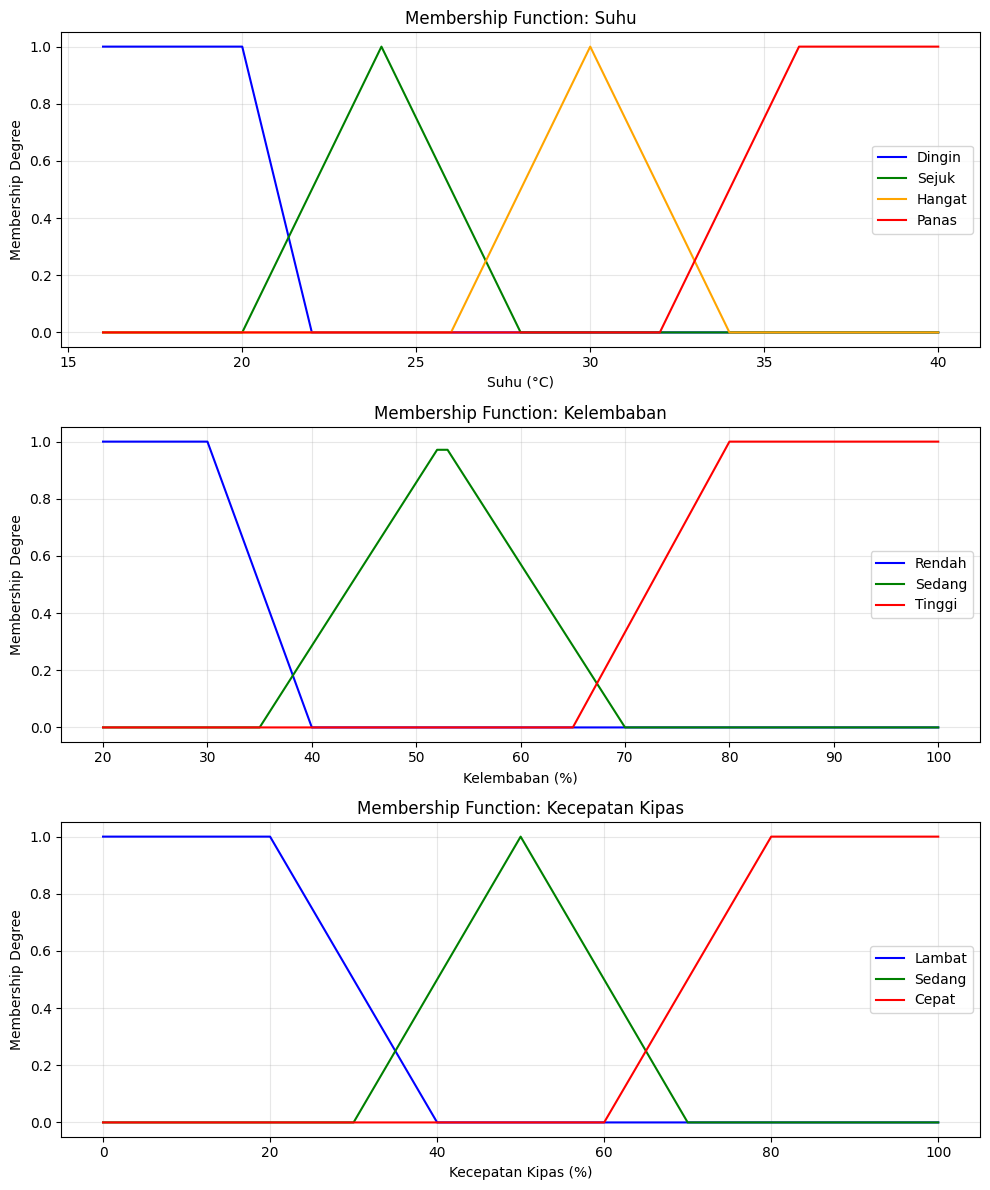

In [5]:
# Visualisasi membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 12))

# Suhu
ax0.plot(temperature.universe, temperature['dingin'].mf, 'b', linewidth=1.5, label='Dingin')
ax0.plot(temperature.universe, temperature['sejuk'].mf, 'g', linewidth=1.5, label='Sejuk')
ax0.plot(temperature.universe, temperature['hangat'].mf, 'orange', linewidth=1.5, label='Hangat')
ax0.plot(temperature.universe, temperature['panas'].mf, 'r', linewidth=1.5, label='Panas')
ax0.set_title('Membership Function: Suhu')
ax0.set_xlabel('Suhu (°C)')
ax0.set_ylabel('Membership Degree')
ax0.legend()
ax0.grid(True, alpha=0.3)

# Kelembaban
ax1.plot(humidity.universe, humidity['rendah'].mf, 'b', linewidth=1.5, label='Rendah')
ax1.plot(humidity.universe, humidity['sedang'].mf, 'g', linewidth=1.5, label='Sedang')
ax1.plot(humidity.universe, humidity['tinggi'].mf, 'r', linewidth=1.5, label='Tinggi')
ax1.set_title('Membership Function: Kelembaban')
ax1.set_xlabel('Kelembaban (%)')
ax1.set_ylabel('Membership Degree')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Kecepatan Kipas
ax2.plot(fan_speed.universe, fan_speed['lambat'].mf, 'b', linewidth=1.5, label='Lambat')
ax2.plot(fan_speed.universe, fan_speed['sedang'].mf, 'g', linewidth=1.5, label='Sedang')
ax2.plot(fan_speed.universe, fan_speed['cepat'].mf, 'r', linewidth=1.5, label='Cepat')
ax2.set_title('Membership Function: Kecepatan Kipas')
ax2.set_xlabel('Kecepatan Kipas (%)')
ax2.set_ylabel('Membership Degree')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Fuzzy Rules

Rules berdasarkan kombinasi suhu dan kelembaban:
- Jika suhu dingin dan kelembaban rendah → kipas lambat
- Jika suhu dingin dan kelembaban sedang → kipas lambat
- Jika suhu dingin dan kelembaban tinggi → kipas sedang
- Jika suhu sejuk dan kelembaban rendah → kipas lambat
- Jika suhu sejuk dan kelembaban sedang → kipas sedang
- Jika suhu sejuk dan kelembaban tinggi → kipas cepat
- Jika suhu hangat dan kelembaban rendah → kipas sedang
- Jika suhu hangat dan kelembaban sedang → kipas cepat
- Jika suhu hangat dan kelembaban tinggi → kipas cepat
- Jika suhu panas → kipas cepat (regardless of humidity)

In [6]:
# Definisi fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['rendah'], fan_speed['lambat'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['sedang'], fan_speed['lambat'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['tinggi'], fan_speed['sedang'])

rule4 = ctrl.Rule(temperature['sejuk'] & humidity['rendah'], fan_speed['lambat'])
rule5 = ctrl.Rule(temperature['sejuk'] & humidity['sedang'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['sejuk'] & humidity['tinggi'], fan_speed['cepat'])

rule7 = ctrl.Rule(temperature['hangat'] & humidity['rendah'], fan_speed['sedang'])
rule8 = ctrl.Rule(temperature['hangat'] & humidity['sedang'], fan_speed['cepat'])
rule9 = ctrl.Rule(temperature['hangat'] & humidity['tinggi'], fan_speed['cepat'])

rule10 = ctrl.Rule(temperature['panas'] & humidity['rendah'], fan_speed['cepat'])
rule11 = ctrl.Rule(temperature['panas'] & humidity['sedang'], fan_speed['cepat'])
rule12 = ctrl.Rule(temperature['panas'] & humidity['tinggi'], fan_speed['cepat'])

# Buat control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, 
                                rule7, rule8, rule9, rule10, rule11, rule12])
fan_control = ctrl.ControlSystemSimulation(fan_ctrl)

## 5. Testing dengan Dataset

In [7]:
# Fungsi untuk prediksi kecepatan kipas
def predict_fan_speed(temp, hum):
    fan_control.input['temperature'] = temp
    fan_control.input['humidity'] = hum
    fan_control.compute()
    return fan_control.output['fan_speed']

# Prediksi untuk seluruh dataset
df['predicted_fan_speed'] = df.apply(lambda row: predict_fan_speed(row['temperature'], row['humidity']), axis=1)

# Hitung error
df['error'] = abs(df['fan_speed'] - df['predicted_fan_speed'])
df['error_percentage'] = (df['error'] / df['fan_speed']) * 100

print(f"Mean Absolute Error: {df['error'].mean():.2f}%")
print(f"Mean Error Percentage: {df['error_percentage'].mean():.2f}%")
print(f"\nSample predictions:")
df[['temperature', 'humidity', 'fan_speed', 'predicted_fan_speed', 'error']].head(10)

Mean Absolute Error: 11.14%
Mean Error Percentage: 20.83%

Sample predictions:


,temperature,humidity,fan_speed,predicted_fan_speed,error
0,16,30,20,15.555556,4.444444
1,17,35,20,17.619048,2.380952
2,18,40,25,18.608059,6.391941
3,19,45,25,17.301587,7.698413
4,20,50,30,16.103896,13.896104
5,21,55,35,28.083333,6.916667
6,22,60,40,50.000000,10.000000
7,23,65,45,50.000000,5.000000
8,24,70,50,81.616162,31.616162
9,25,75,55,83.111111,28.111111


## 6. Visualisasi Hasil

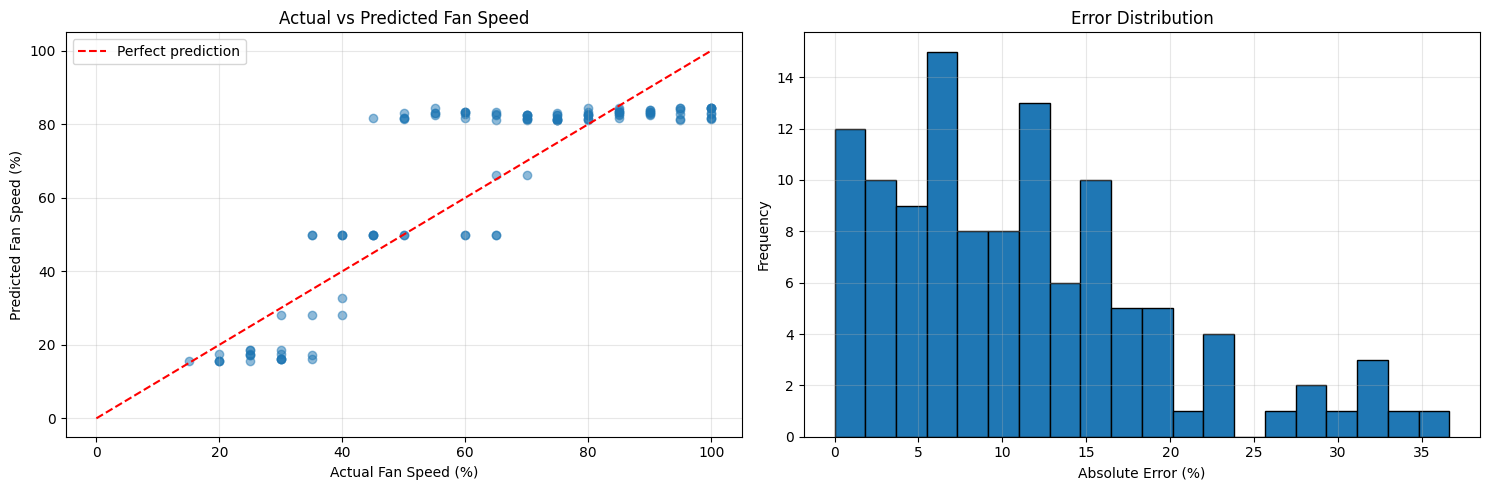

In [8]:
# Plot perbandingan actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(df['fan_speed'], df['predicted_fan_speed'], alpha=0.5)
axes[0].plot([0, 100], [0, 100], 'r--', label='Perfect prediction')
axes[0].set_xlabel('Actual Fan Speed (%)')
axes[0].set_ylabel('Predicted Fan Speed (%)')
axes[0].set_title('Actual vs Predicted Fan Speed')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Error distribution
axes[1].hist(df['error'], bins=20, edgecolor='black')
axes[1].set_xlabel('Absolute Error (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Error Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Testing dengan Input Manual

In [9]:
# Test dengan beberapa skenario
test_cases = [
    (18, 30, "Ruangan dingin, kelembaban rendah"),
    (25, 50, "Ruangan sejuk, kelembaban sedang"),
    (32, 80, "Ruangan hangat, kelembaban tinggi"),
    (38, 90, "Ruangan panas, kelembaban tinggi"),
    (22, 70, "Ruangan sejuk, kelembaban tinggi")
]

print("Testing Fuzzy Logic System:\n")
print(f"{'Temp (°C)':<12} {'Humidity (%)':<15} {'Fan Speed (%)':<15} {'Kondisi':<40}")
print("="*85)

for temp, hum, desc in test_cases:
    speed = predict_fan_speed(temp, hum)
    print(f"{temp:<12} {hum:<15} {speed:<15.2f} {desc:<40}")

Testing Fuzzy Logic System:

Temp (°C)    Humidity (%)    Fan Speed (%)   Kondisi                                 
18           30              15.56           Ruangan dingin, kelembaban rendah       
25           50              50.00           Ruangan sejuk, kelembaban sedang        
32           80              82.38           Ruangan hangat, kelembaban tinggi       
38           90              84.44           Ruangan panas, kelembaban tinggi        
22           70              81.62           Ruangan sejuk, kelembaban tinggi        


## 8. 3D Surface Plot

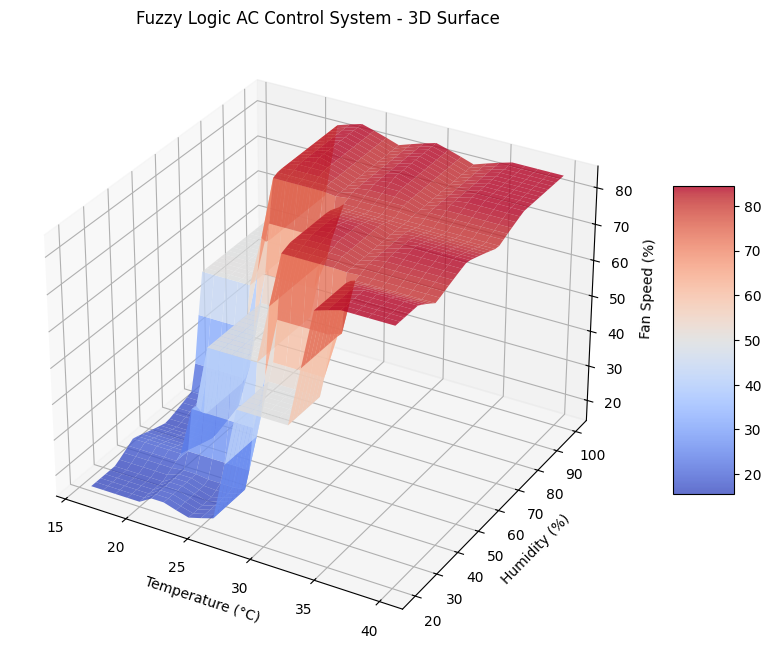

In [10]:
# 3D visualization of fuzzy system
from mpl_toolkits.mplot3d import Axes3D

# Create mesh
temp_range = np.arange(16, 41, 1)
hum_range = np.arange(20, 101, 2)
temp_mesh, hum_mesh = np.meshgrid(temp_range, hum_range)

# Calculate fan speed for each point
fan_mesh = np.zeros_like(temp_mesh, dtype=float)
for i in range(temp_mesh.shape[0]):
    for j in range(temp_mesh.shape[1]):
        fan_mesh[i, j] = predict_fan_speed(temp_mesh[i, j], hum_mesh[i, j])

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(temp_mesh, hum_mesh, fan_mesh, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Fan Speed (%)')
ax.set_title('Fuzzy Logic AC Control System - 3D Surface')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()